In [1]:
# compare the sextractor catalog from my stacked image
# to the dophot catalog that Brian Stalder ran

In [1]:
import sys # needed to import cat_utils 
# sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')
sys.path.insert(0, '/home/abrahamn/21cmIRxcor/')

In [2]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/home/abrahamn/21cmIRxcor/cat_utils.pyc'>

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
#raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
raw_frames_path = '/home/abrahamn/xcor_data/ATLAS_mwa57694_rereduction/'

analysis_root = '/home/abrahamn/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
dphcat = cat_utils.IRCatalog(dph_path=raw_frames_path+'02a57694o0326I.dph')#,fits_path=analysis_root+'02a57694o0326I/02a57694o0326I_5degframecentered.fits')
dphcat.ra = dphcat.ra_all
dphcat.jy = dphcat.jy_all
dphcat.dec = dphcat.dec_all

loading /home/abrahamn/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0326I.dph


In [13]:
# secat = cat_utils.IRCatalog(se_path=analysis_root+'field0/field0.sex',fits_path=analysis_root+'/field0/field0.fits')

import pickle
catdir = '/home/abrahamn/xcor_data/ir_catalogs/'
secat = pickle.load( open(catdir+'whole_field_secat.p', "rb" ) )
g = secat.jy>1.e-10
secat = cat_utils.Catalog(secat.ra[g],secat.dec[g],secat.jy[g])

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(dphcat.ra,dphcat.dec,15000*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.scatter(secat.ra,secat.dec,15000*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.xlim([-2,0])
plt.ylim([-26,-24.5])

(-26, -24.5)

(30, 31)
(30, 31)


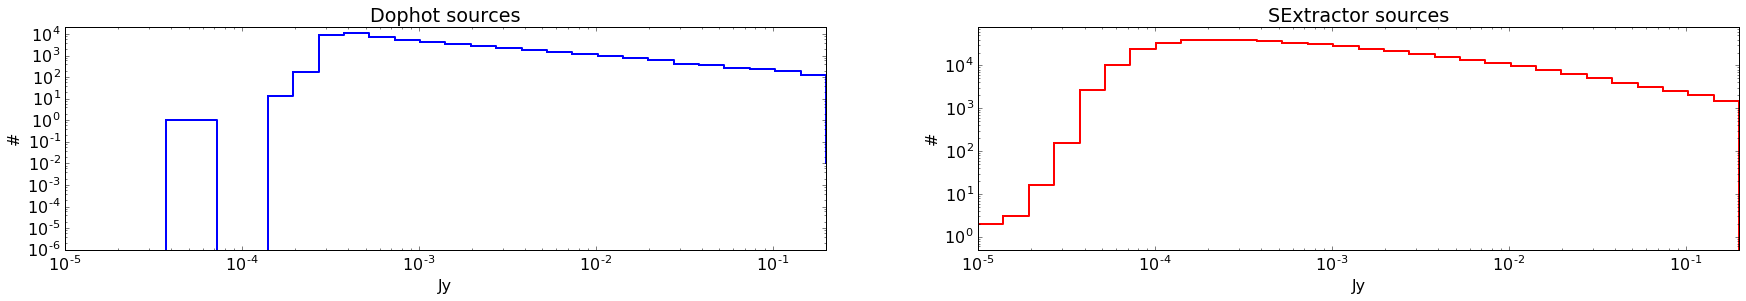

In [15]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(plt,dphcat.jy[dphcat.jy<5],.00001,.2,30,'b')
plt.xlim([.00001,.2])#plt.xlim([0,.01])
plt.title('Dophot sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(plt,secat.jy[secat.jy<5],.00001,.2,30,'r')
plt.xlim([.00001,.2])
#plt.xlim([0,10])
plt.title('SExtractor sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')